# Visualizing how planet model parameters affect transits observed

In [4]:
from importlib import reload # useful during development to reload packages

import lightkurve as lk
from lightkurve_ext import of_sector, of_sectors, of_2min_cadences
import lightkurve_ext as lke
import lightkurve_ext_batman as lke_batman
import batman as batman

from astropy import units as u
from astropy.time import Time

import numpy as np

import matplotlib.pyplot as plt
import matplotlib as matplotlib

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

%matplotlib inline

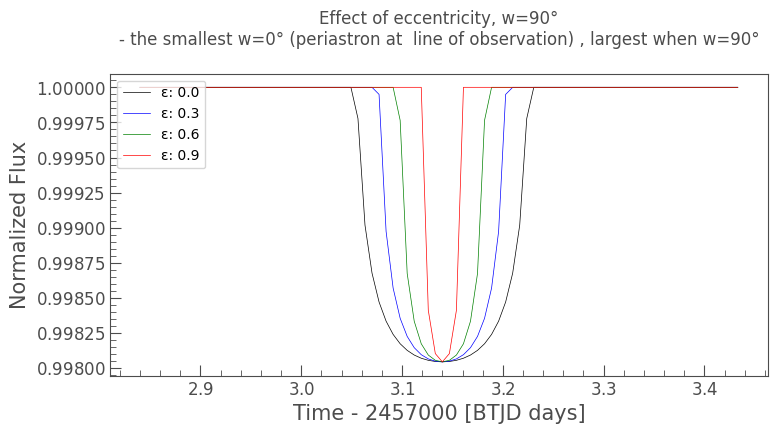

In [70]:
reload(lke_batman)

ma = batman.TransitParams()
ma.t0 = 3.14  # time of inferior conjunction; first transit is X days after start
ma.per = 10.123  # orbital period
ma.rp = 26371 / 696342  # (in units of stellar radii)
ma.a = 19  # semi-major axis (in units of stellar radii)
ma.inc = 90  # orbital inclination (in degrees)
ma.ecc = 0.0 # eccentricity
ma.w = 90 # longitude of periastron (in degrees)
ma.u = [0.4, 0.8]  # limb darkening coefficients
ma.limb_dark = "quadratic"  # limb darkening model

zoom_plot_duration = 0.6
num_days, num_days_start, cadence_in_min = zoom_plot_duration, ma.t0 - zoom_plot_duration/2, 10
noise_stddev = 0 * 10**-6 

with plt.style.context(lk.MPLSTYLE):
    ax = plt.figure().gca()
for ecc , color in zip([0.0, 0.3, 0.6, 0.9], ["black", "blue", "green", "red"]):
    ma.ecc = ecc
    lc = lke_batman.create_lightcurve_from_batman(ma, (num_days_start, num_days_start + num_days, "btjd", "tdb", int(num_days * ((60 / cadence_in_min) * 24))), noise_stddev, nthreads=1)
    ax = lc.plot(ax=ax, label=f"ε: {ma.ecc}", c=color);

ax.legend(loc="upper left")
ax.set_title(f"""Effect of eccentricity, w={ma.w}°
- the smallest w=0° (periastron at  line of observation) , largest when w=90°
""");

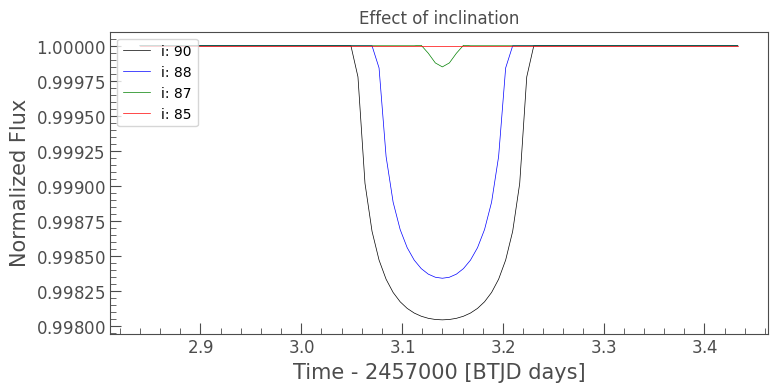

In [53]:
ma = batman.TransitParams()
ma.t0 = 3.14  # time of inferior conjunction; first transit is X days after start
ma.per = 10.123  # orbital period
ma.rp = 26371 / 696342  # (in units of stellar radii)
ma.a = 19  # semi-major axis (in units of stellar radii)
ma.inc = 90  # orbital inclination (in degrees)
ma.ecc = 0.0 # eccentricity
ma.w = 90  # longitude of periastron (in degrees)
ma.u = [0.4, 0.8]  # limb darkening coefficients
ma.limb_dark = "quadratic"  # limb darkening model

zoom_plot_duration = 0.6
num_days, num_days_start, cadence_in_min = zoom_plot_duration, ma.t0 - zoom_plot_duration/2, 10
noise_stddev = 0 * 10**-6 

with plt.style.context(lk.MPLSTYLE):
    ax = plt.figure().gca()
for inc , color in zip([90, 88, 87, 85], ["black", "blue", "green", "red"]):
    ma.inc = inc
    lc = lke_batman.create_lightcurve_from_batman(ma, (num_days_start, num_days_start + num_days, "btjd", "tdb", int(num_days * ((60 / cadence_in_min) * 24))), noise_stddev)
    ax = lc.plot(ax=ax, label=f"i: {ma.inc}", c=color);

ax.legend(loc="upper left")
ax.set_title("Effect of inclination");